In [1]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/My\ Drive/Interview_dataset-Diabetic_Retinopathy_Classification.zip

Archive:  gdrive/My Drive/Interview_dataset-Diabetic_Retinopathy_Classification.zip
   creating: Interview dataset-Diabetic Retinopathy Classification/
   creating: Interview dataset-Diabetic Retinopathy Classification/Test/
   creating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/
  inflating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_1000.png  
  inflating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_981.png  
  inflating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_982.png  
  inflating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_983.png  
  inflating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_984.png  
  inflating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_985.png  
  inflating: Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_986.png  
  infla

In [4]:
# Importing Libraries
# Importing Library for Data Visualization
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np

import cv2

# Importing Tensorflow for model creation and its dependencies
import tensorflow

# Generate batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator
# for enabling inline plotting
%matplotlib inline

In [5]:
# Deep Learning CNN model to recognize RETINOPATHY
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''

'''########################## IMAGE PRE-PROCESSING for TRAINING and TESTING data ##############################'''

TrainingImagePath=R'/content/Interview dataset-Diabetic Retinopathy Classification/Train'
TestingImagePath=R'/content/Interview dataset-Diabetic Retinopathy Classification/Test'
ValidationImagePath=R'/content/Interview dataset-Diabetic Retinopathy Classification/Valid'

# Defining pre-processing transformations on raw images of training data
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TestingImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# Generating the Testing Data
valid_set = test_datagen.flow_from_directory(
        ValidationImagePath,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 750 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 115 images belonging to 5 classes.


In [6]:
# Printing class labels for each IMAGE GROUPS
test_set.class_indices

{'Healthy': 0,
 'Mild DR': 1,
 'Moderate DR': 2,
 'Proliferate DR': 3,
 'Severe DR': 4}

In [7]:
'''#################### Creating lookup table for all RETINOPATHY IMAGE SET ##############################'''
# class_indices have the numeric tag for each IMAGE
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for imgValue,imgName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[imgValue]=imgName

# Saving the face map for future reference
import pickle
with open(R"D:\Data Sets\ResultsMap.pkl", 'wb') as f:
    pickle.dump(ResultMap, f, pickle.HIGHEST_PROTOCOL)

print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'Healthy', 1: 'Mild DR', 2: 'Moderate DR', 3: 'Proliferate DR', 4: 'Severe DR'}

 The Number of output neurons:  5


In [8]:
'''######################## Create CNN deep learning model ####################################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))
'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

'''# STEP--3 FLattening'''
classifier.add(Flatten())

'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(OutputNeurons, activation='softmax'))



'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [10]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=500,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

<ipython-input-10-928b536cbf75>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/500
24/24 [==============================] - 20s 284ms/step - loss: 3.1218 - accuracy: 0.2413 - val_loss: 1.4981 - val_accuracy: 0.3478
Epoch 2/500
24/24 [==============================] - 5s 224ms/step - loss: 1.5011 - accuracy: 0.3227 - val_loss: 1.4622 - val_accuracy: 0.4261
Epoch 3/500
24/24 [==============================] - 4s 185ms/step - loss: 1.3765 - accuracy: 0.4267 - val_loss: 1.5129 - val_accuracy: 0.4522
Epoch 4/500
24/24 [==============================] - 7s 297ms/step - loss: 1.4135 - accuracy: 0.4147 - val_loss: 1.2370 - val_accuracy: 0.4522
Epoch 5/500
24/24 [==============================] - 4s 184ms/step - loss: 1.3121 - accuracy: 0.4347 - val_loss: 1.4000 - val_accuracy: 0.4696
Epoch 6/500
24/24 [==============================] - 8s 293ms/step - loss: 1.3079 - accuracy: 0.4333 - val_loss: 1.5319 - val_accuracy: 0.4435
Epoch 7/500
24/24 [==============================] - 5s 188ms/step - loss: 1.2815 - accuracy: 0.4427 - val_loss: 1.1746 - val_accuracy: 0.495

In [11]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

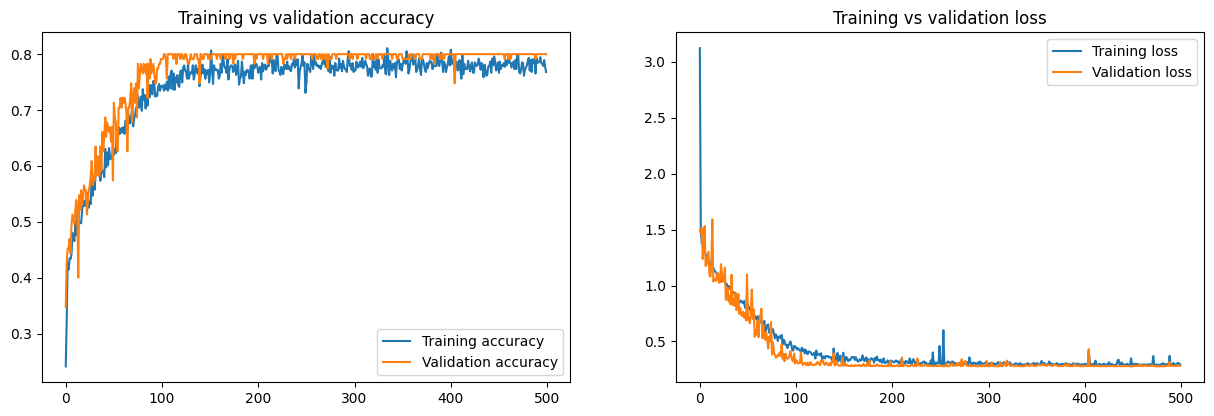

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [13]:
## Saving the model
classifier.save(R"D:\Data Sets\classifier.pkl")

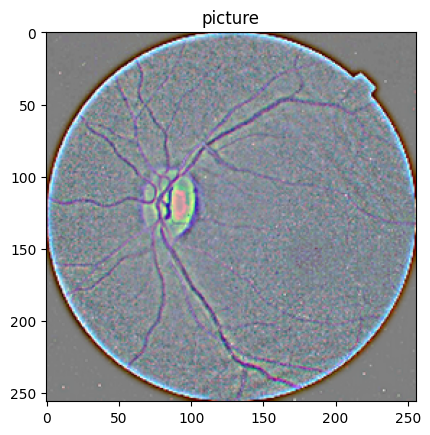

########################################
Prediction is:  Healthy


In [14]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage=R"/content/Interview dataset-Diabetic Retinopathy Classification/Test/Healthy/Healthy_984.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

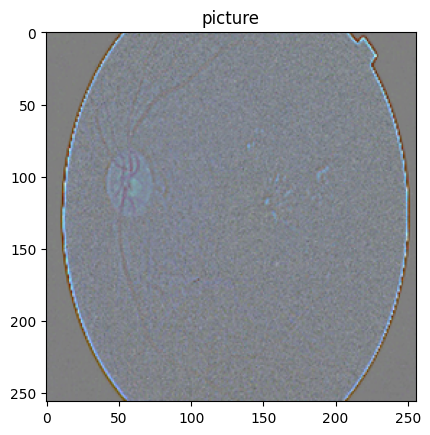

########################################
Prediction is:  Mild DR


In [17]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage=R"/content/Interview dataset-Diabetic Retinopathy Classification/Test/Mild DR/Mild_DR_366.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

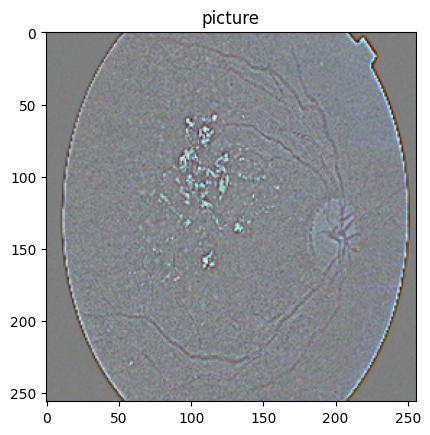

########################################
Prediction is:  Moderate DR


In [19]:
'''########################## Making single predictions ############################'''
from tensorflow.keras.utils import load_img, img_to_array

testImage=R"/content/Interview dataset-Diabetic Retinopathy Classification/Test/Moderate DR/Moderate_DR_891.png"
test_image=load_img(testImage,target_size=(128, 128))
test_image=img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image,verbose=0)

img = cv2.imread(testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.imshow(img)
plt.title('picture')
plt.show()

print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])